In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import plotly.express as px
import plotly
import plotly.graph_objects as go

# Clustering

In [3]:
# Import 
scaled_bb_pca = pd.read_csv('../data/scaled_bb_pca.csv', index_col=0)
scaled_bb_pca

,income,age,years_with_bank,nbr_children,marital_status,savings_active,total_savings,credit_active,debt
0,0.181399,0.434211,0.555556,0.2,0.333333,0.0,0.178426,0.0,0.000000
1,0.045818,0.763158,0.111111,0.0,0.333333,0.0,0.131055,1.0,0.162972
2,0.128665,0.328947,0.888889,0.0,0.000000,1.0,0.179130,1.0,0.030178
3,0.330667,0.539474,0.333333,0.0,0.000000,1.0,0.179098,0.0,0.000000
4,0.309066,0.605263,1.000000,0.4,1.000000,1.0,0.178706,1.0,0.007229
...,...,...,...,...,...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2,1.000000,0.0,0.178426,0.0,0.000000
743,0.183043,0.565789,0.666667,0.2,0.333333,1.0,0.172960,1.0,0.136842
744,0.425231,0.486842,0.000000,0.4,0.333333,0.0,0.178426,1.0,0.968421
745,0.104747,0.315789,0.777778,0.0,0.333333,0.0,0.178426,0.0,0.187997


## K Means

In [4]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

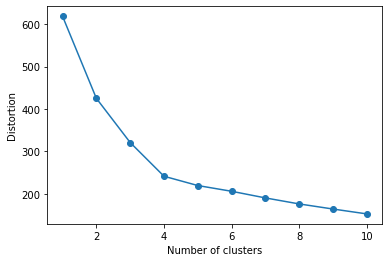

In [15]:
import warnings
warnings.filterwarnings("ignore")
plot_distortion(scaled_bb_pca, max_clusters = 10)

In [16]:
# K_means parameters
km = KMeans(n_clusters=4,
            n_init=10,
            random_state=0)

In [20]:
# K Means fit and predict
y_km = km.fit_predict(scaled_bb_pca.iloc[:,:4])
y_km

array([3, 1, 3, 1, 3, 2, 0, 3, 2, 3, 3, 0, 1, 0, 2, 0, 1, 0, 3, 0, 1, 1,
       3, 3, 2, 1, 0, 3, 3, 1, 1, 1, 2, 3, 1, 2, 0, 1, 3, 0, 0, 2, 1, 2,
       1, 1, 1, 0, 3, 1, 0, 0, 3, 3, 3, 1, 1, 3, 1, 3, 2, 0, 0, 1, 3, 0,
       3, 2, 0, 0, 1, 2, 3, 1, 3, 3, 0, 1, 0, 3, 1, 3, 1, 0, 3, 2, 1, 1,
       1, 3, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 3, 3, 2, 1, 2, 1, 3, 3, 3, 3,
       0, 3, 3, 1, 2, 3, 2, 1, 3, 2, 1, 2, 3, 2, 0, 3, 0, 1, 2, 0, 3, 1,
       0, 1, 3, 0, 3, 3, 0, 1, 3, 3, 3, 0, 3, 0, 3, 3, 1, 2, 0, 1, 1, 1,
       1, 3, 0, 3, 2, 3, 3, 3, 3, 2, 2, 2, 1, 0, 1, 3, 1, 3, 3, 1, 0, 0,
       3, 3, 3, 1, 3, 0, 3, 0, 3, 1, 1, 2, 3, 2, 1, 2, 0, 0, 2, 0, 0, 0,
       2, 2, 3, 3, 0, 0, 1, 3, 0, 1, 0, 3, 0, 0, 3, 3, 0, 2, 0, 2, 1, 2,
       3, 2, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 2, 0,
       1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1, 1, 1, 2, 3, 2, 2,
       0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 3, 2, 1, 1, 1, 0, 0, 3, 3, 2, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 1, 3, 0, 1, 3, 0, 0, 0,

In [21]:
scaled_bb_pca['cluster'] = y_km
scaled_bb_pca

,income,age,years_with_bank,nbr_children,marital_status,savings_active,total_savings,credit_active,debt,cluster
0,0.181399,0.434211,0.555556,0.2,0.333333,0.0,0.178426,0.0,0.000000,3
1,0.045818,0.763158,0.111111,0.0,0.333333,0.0,0.131055,1.0,0.162972,1
2,0.128665,0.328947,0.888889,0.0,0.000000,1.0,0.179130,1.0,0.030178,3
3,0.330667,0.539474,0.333333,0.0,0.000000,1.0,0.179098,0.0,0.000000,1
4,0.309066,0.605263,1.000000,0.4,1.000000,1.0,0.178706,1.0,0.007229,3
...,...,...,...,...,...,...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2,1.000000,0.0,0.178426,0.0,0.000000,3
743,0.183043,0.565789,0.666667,0.2,0.333333,1.0,0.172960,1.0,0.136842,3
744,0.425231,0.486842,0.000000,0.4,0.333333,0.0,0.178426,1.0,0.968421,2
745,0.104747,0.315789,0.777778,0.0,0.333333,0.0,0.178426,0.0,0.187997,3


In [23]:
banking_radar = scaled_bb_pca.groupby('cluster').mean()
banking_radar

,income,age,years_with_bank,nbr_children,marital_status,savings_active,total_savings,credit_active,debt
cluster,,,,,,,,,
0,0.047311,0.086466,0.365079,0.019704,0.078818,0.551724,0.190332,0.472906,0.042076
1,0.185363,0.565649,0.208038,0.042553,0.310284,0.526596,0.188738,0.606383,0.085045
2,0.221601,0.332420,0.325617,0.509722,0.516204,0.451389,0.195520,0.583333,0.103970
3,0.195338,0.556542,0.774633,0.100943,0.334906,0.466981,0.202813,0.608491,0.089009


In [27]:
def plotRadarChart(data):
    temp_list = []
    for i in range(len(data)):
        temp_list.append(go.Scatterpolar(
                                        r=data.iloc[i,:9].values,
                                        theta=data.columns[:9],
                                        name=str(data.index[i]),
                                        fill='toself'
        ))

    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                        showlegend = True)     
    fig = go.Figure(data = temp_list, layout = layout)     
    fig.show()

In [28]:
plotRadarChart(banking_radar.iloc[:,:9])